## Univariate Time series Analysis and Forecasting 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
airData=pd.read_csv('AirPassengers.csv')
airData.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
airData.columns=['Month','PassengerCount']

In [4]:
yearList=[entry[0:4] for entry in airData['Month']]
mylist = list(set(yearList))
print(mylist)
len(mylist)

['1957', '1960', '1956', '1955', '1952', '1951', '1949', '1954', '1953', '1959', '1958', '1950']


12

In [5]:
yearList=[entry[0:4] for entry in airData['Month']]
airData.groupby(yearList)['PassengerCount'].mean() ###Growing values

1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
Name: PassengerCount, dtype: float64

## Time Series Analysis

In [6]:
airData.shape

(144, 2)

In [7]:
airData.dtypes

Month             object
PassengerCount     int64
dtype: object

In [8]:
airData.describe(include='all')
##since mean of the series is non zero, it is not white noise and forecasting is psbl

,Month,PassengerCount
count,144,144.000000
unique,144,NaN
top,1949-04,NaN
freq,1,NaN
mean,NaN,280.298611
std,NaN,119.966317
min,NaN,104.000000
25%,NaN,180.000000
50%,NaN,265.500000
75%,NaN,360.500000


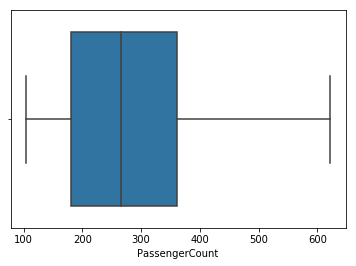

In [9]:
sns.boxplot('PassengerCount',data=airData)

In [10]:
airData.isna().sum()

Month             0
PassengerCount    0
dtype: int64

In [11]:
airData.duplicated().sum()

0

In [12]:
print(type(airData['Month'][0]))

<class 'str'>


In [13]:
airData['Date']=pd.to_datetime(airData['Month'],format='%Y-%m')

In [14]:
airData.set_index('Date',inplace=True)

### Series white noise or not 

In [15]:
airData.describe(include='all')
##since mean of the series is non zero, it is not white noise and forecasting is psbl

,Month,PassengerCount
count,144,144.000000
unique,144,NaN
top,1949-04,NaN
freq,1,NaN
mean,NaN,280.298611
std,NaN,119.966317
min,NaN,104.000000
25%,NaN,180.000000
50%,NaN,265.500000
75%,NaN,360.500000


c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


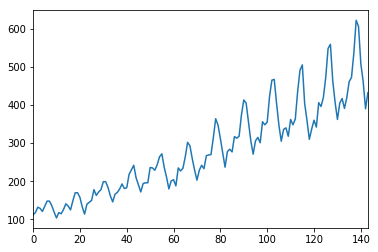

In [16]:
sns.tsplot(airData.PassengerCount)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001471E3CE80>]],
      dtype=object)

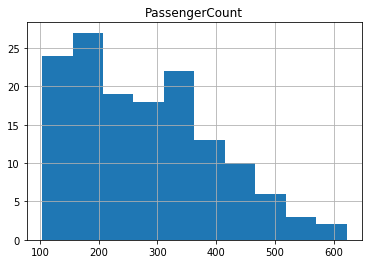

In [17]:
airData.hist()
#squashed distribution of the observations may be another indicator of a non-stationary time series.
##EXPONENTIALLY GROWING GRAPH

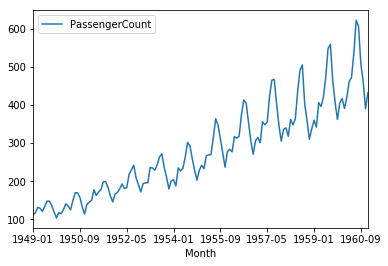

In [18]:
##EXPONENTIALLY GROWING GRAPH
airData[['Month','PassengerCount']].plot('Month')

In [19]:
# airData[['Date','PassengerCount']].plot('Date')

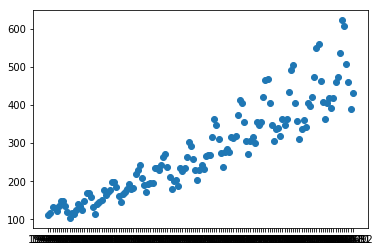

In [20]:
plt.scatter(airData.Month,airData.PassengerCount)####since scatter plot is not random, no white noise

### Series stationary or not

In [21]:
airData.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Date', length=144, freq=None)

In [22]:
airDataValues=airData.values
split=len(airDataValues)/2
## normal loc doesnt work.....as  date time is included so use .index and integer split.
airData1=airData.loc[airData.index[0:int(split)]] 
airData2=airData.loc[airData.index[int(split):]]

In [23]:
airDataValues[0][0]

'1949-01'

In [24]:
airData1.shape

(72, 2)

In [25]:
airData2.shape

(72, 2)

In [26]:
##checking for mean n var....whther they are constant in both groups
mean_1,mean_2=airData1.mean(),airData2.mean()
var_1,var_2=airData1.var(),airData2.var()
print(f'Mean of 1st group:{mean_1} and Variance is {var_1}') #182.902778 , 2275.69464
print(f'Mean of 2nd group:{mean_2} and Variance is {var_2}') #377.694444 , 7471.736307
####thus, mean and var of both group differ alot
print(f'Mean difference of both groups:{mean_2-mean_1}') #### diff is large so  it is non stationary series

Mean of 1st group:PassengerCount    182.902778
dtype: float64 and Variance is PassengerCount    2275.69464
dtype: float64
Mean of 2nd group:PassengerCount    377.694444
dtype: float64 and Variance is PassengerCount    7471.736307
dtype: float64
Mean difference of both groups:PassengerCount    194.791667
dtype: float64


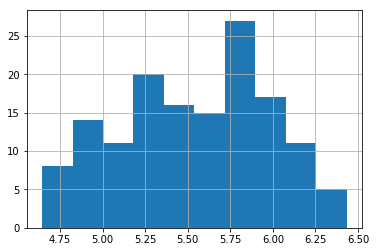

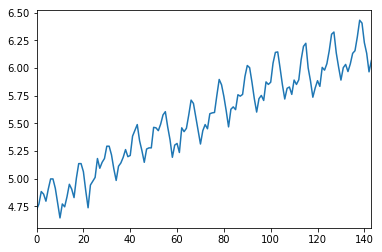

In [27]:
####as the graph earlier was exponentially growing and was not stationary, just trying with log transform of the series to make it stationary
psgrSeries=pd.Series(airData['PassengerCount'].values) ###Only passenger count values
X=np.log(psgrSeries) ## log
X.hist()
plt.show()
X.plot()
plt.show()


In [28]:
####exploring the mean and var
psgrSeries1=X[0:int(split)]
psgrSeries2=X[int(split):]
##checking for mean n var....whther they are constant in both groups
mean_1,mean_2=psgrSeries1.mean(),psgrSeries2.mean()
var_1,var_2=psgrSeries1.var(),psgrSeries2.var()
print(f'Mean of 1st group:{mean_1} and Variance is {var_1}') #5.17514614000377  , 0.06933788695311015
print(f'Mean of 2nd group:{mean_2} and Variance is {var_2}') #5.909205777059973 , 0.04995805564027292
####thus, mean and var of both group differ alot
print(f'Mean difference of both groups:{mean_2-mean_1}')##0.7340596370562027 #### diff is less so it is stationary series

Mean of 1st group:5.17514614000377 and Variance is 0.06933788695311015
Mean of 2nd group:5.909205777059973 and Variance is 0.04995805564027292
Mean difference of both groups:0.7340596370562027


In [29]:
####statistical test for stationarity-Augmented Dickey-Fuller test(type of unit root test)
print('--------------------For normal series----------------')
stats_result=adfuller(airData['PassengerCount'].values)
print(stats_result)
print(f'ADF Test statistic: {stats_result[0]}')
print(f'p-value: {stats_result[1]}')
print('Critical values:')
for key,value in stats_result[4].items():
    print(key,':',value)
print(f'Max info criterion value:{stats_result[-1]}')
####### since adf test statistic value > critical value at 1% this means the series is non stationary

--------------------For normal series----------------
(0.8153688792060543, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
ADF Test statistic: 0.8153688792060543
p-value: 0.9918802434376411
Critical values:
1% : -3.4816817173418295
5% : -2.8840418343195267
10% : -2.578770059171598
Max info criterion value:996.692930839019


In [30]:
####statistical test for stationarity-Augmented Dickey-Fuller test(type of unit root test)
print('------------------------For logarithmic transformed series----------------')
stats_result=adfuller(X.values)
print(stats_result)
print(f'ADF Test statistic: {stats_result[0]}')
print(f'p-value: {stats_result[1]}')
print('Critical values:')
for key,value in stats_result[4].items():
    print(key,':',value)
print(f'Max info criterion value:{stats_result[-1]}')
####### since adf test statistic value > critical value at 1% this means the series is non stationary

------------------------For logarithmic transformed series----------------
(-1.7170170891069625, 0.4223667747703904, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)
ADF Test statistic: -1.7170170891069625
p-value: 0.4223667747703904
Critical values:
1% : -3.4816817173418295
5% : -2.8840418343195267
10% : -2.578770059171598
Max info criterion value:-445.3990312497209


## Observations abt the data:
1) No white noise
2) Not stationary


In [31]:
#Estimating & Eliminating Trend


In [32]:
#### stationarize the series-https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
#1) Transformation

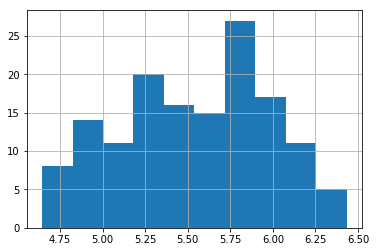

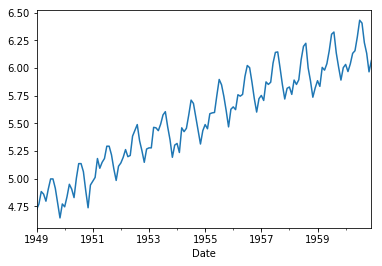

In [33]:
####as the graph earlier was exponentially growing and was not stationary, just trying with log transform of the series to make it stationary
# psgrSeries=pd.Series(airData['PassengerCount'].values) ###Only passenger count values
psgrSeries=airData['PassengerCount']
# ts.head()
X=np.log(psgrSeries) ## log
X.hist()
plt.show()
X.plot()
plt.show()


In [34]:
####exploring the mean and var
psgrSeries1=X[0:int(split)]
psgrSeries2=X[int(split):]
##checking for mean n var....whther they are constant in both groups
mean_1,mean_2=psgrSeries1.mean(),psgrSeries2.mean()
var_1,var_2=psgrSeries1.var(),psgrSeries2.var()
print(f'Mean of 1st group:{mean_1} and Variance is {var_1}') #5.17514614000377  , 0.06933788695311015
print(f'Mean of 2nd group:{mean_2} and Variance is {var_2}') #5.909205777059973 , 0.04995805564027292
####thus, mean and var of both group differ alot
print(f'Mean difference of both groups:{mean_2-mean_1}')##0.7340596370562027 #### diff is somewhat less 

Mean of 1st group:5.17514614000377 and Variance is 0.06933788695311015
Mean of 2nd group:5.909205777059973 and Variance is 0.04995805564027292
Mean difference of both groups:0.7340596370562027


In [35]:
##techniques to estimate the trend : aggregation,smoothing,polynomialfitting
# Aggregation – taking average for a time period like monthly/weekly averages
# Smoothing – taking rolling averages
# Polynomial Fitting – fit a regression model

#### Smoothing

In [36]:
#####Smoothing- Moving Average
# In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. 


##### Smoothing- Moving Average


In [37]:
yearList=[entry[0:4] for entry in airData['Month']]
mylist = list(set(yearList))
print(mylist)
len(mylist)

['1957', '1960', '1956', '1955', '1952', '1951', '1949', '1954', '1953', '1959', '1958', '1950']


12

In [38]:
X.head()

Date
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: PassengerCount, dtype: float64

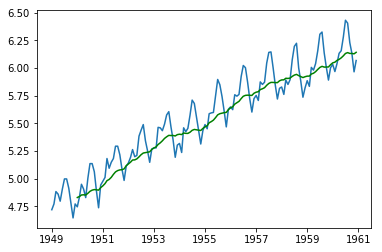

In [39]:
##### Here we can take the average over the past 1 year, i.e. last 12 values. 
rolling_logSeries=X.rolling(13).mean() ###moving average
plt.plot(X)
plt.plot(rolling_logSeries,color='green')


In [40]:
mavg_differencing_val=X-rolling_logSeries
mavg_differencing_val

Date
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01         NaN
1950-01-01   -0.084227
1950-02-01   -0.001938
1950-03-01    0.096842
1950-04-01    0.051628
1950-05-01   -0.022910
1950-06-01    0.136711
1950-07-01    0.250830
1950-08-01    0.240170
1950-09-01    0.161937
1950-10-01   -0.008593
1950-11-01   -0.159442
1950-12-01    0.023137
1951-01-01    0.042378
1951-02-01    0.055841
1951-03-01    0.200412
1951-04-01    0.101226
1951-05-01    0.136338
1951-06-01    0.143437
                ...   
1958-07-01    0.259708
1958-08-01    0.281475
1958-09-01    0.069479
1958-10-01   -0.039530
1958-11-01   -0.177607
1958-12-01   -0.101771
1959-01-01   -0.041057
1959-02-01   -0.092801
1959-03-01    0.059949
1959-04-01    0.028104
1959-05-01    0.072479
1959-06-01    0.169005
1959-0

In [41]:
mavg_differencing_val.dropna(inplace=True)

In [42]:
mavg_differencing_val.head()

Date
1950-01-01   -0.084227
1950-02-01   -0.001938
1950-03-01    0.096842
1950-04-01    0.051628
1950-05-01   -0.022910
Name: PassengerCount, dtype: float64

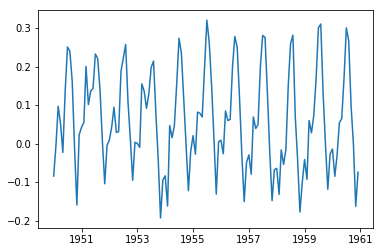

In [43]:
plt.plot(mavg_differencing_val)

In [44]:
####statistical test for stationarity-Augmented Dickey-Fuller test(type of unit root test)
print('------------------------For logarithmic transformed and moving average series----------------')
stats_result=adfuller(mavg_differencing_val.values)
print(stats_result)
print(f'ADF Test statistic: {stats_result[0]}')
print(f'p-value: {stats_result[1]}')
print('Critical values:')
for key,value in stats_result[4].items():
    print(key,':',value)
print(f'Max info criterion value:{stats_result[-1]}')
####### since adf test statistic value > critical value at 5% this means there is 95% confidence that series is stationary

------------------------For logarithmic transformed and moving average series----------------
(-3.0936523864260144, 0.027026520556184017, 13, 118, {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}, -423.56145687809203)
ADF Test statistic: -3.0936523864260144
p-value: 0.027026520556184017
Critical values:
1% : -3.4870216863700767
5% : -2.8863625166643136
10% : -2.580009026141913
Max info criterion value:-423.56145687809203


In [45]:
###drawback :- manually entered the no. of periods (13) 
# if weights are assigned , then more recent value will be given higher weights ---- Weighted moving avg

##### Smoothing- Weighted Moving Average


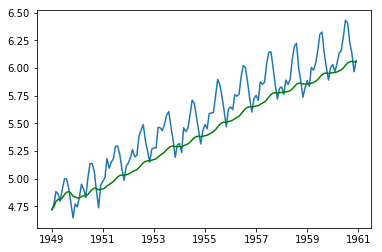

In [46]:
#exponential
#     DataFrame.ewm(ignore_na=False,span=30.007751938,min_periods=0,adjust=True).mean()
exp_weightedAvgLog=X.ewm(halflife=12).mean()
# exp_weightedAvgLog
plt.plot(X)
plt.plot(exp_weightedAvgLog,color='green')


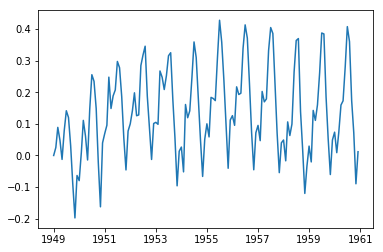

In [47]:
weightedDiff=X-exp_weightedAvgLog
plt.plot(weightedDiff)


In [48]:
####statistical test for stationarity-Augmented Dickey-Fuller test(type of unit root test)
print('------------------------For Exponential weighted moving avg ----------------')
stats_result=adfuller(weightedDiff.values)
print(stats_result)
print(f'ADF Test statistic: {stats_result[0]}')
print(f'p-value: {stats_result[1]}')
print('Critical values:')
for key,value in stats_result[4].items():
    print(key,':',value)
print(f'Max info criterion value:{stats_result[-1]}')
####### since adf test statistic value < critical value at 1% this means the series is stationary

------------------------For Exponential weighted moving avg ----------------
(-3.601262420161675, 0.0057369388015119215, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -462.8241632483199)
ADF Test statistic: -3.601262420161675
p-value: 0.0057369388015119215
Critical values:
1% : -3.4816817173418295
5% : -2.8840418343195267
10% : -2.578770059171598
Max info criterion value:-462.8241632483199


In [49]:
### the above process wont work if data has high seasonality.So implementing techniques mentioned below 

### Eliminating Trend and Seasonality
#### 1) Differencing 2) Decomposing

In [50]:
# Differencing – taking the differece with a particular time lag
# Decomposition – modeling both trend and seasonality and removing them from the model.

### Differencing

In [51]:
X.head()

Date
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: PassengerCount, dtype: float64

In [52]:
X.shift().head()

Date
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
Name: PassengerCount, dtype: float64

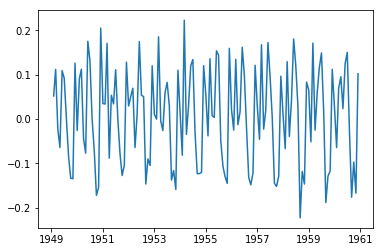

In [53]:
differencingVal=X-X.shift(periods=1) ##ist order (period=1) since 1st order produces low std differencingVal.std():0.10655614752984616 
plt.plot(differencingVal)
differencingVal.dropna(inplace=True)

In [54]:
differencingVal.std()

0.10655614752984616

In [55]:
####statistical test for stationarity-Augmented Dickey-Fuller test(type of unit root test)
print('------------------------For differencing values ----------------')
stats_result=adfuller(differencingVal)
print(stats_result)
print(f'ADF Test statistic: {stats_result[0]}')
print(f'p-value: {stats_result[1]}')
print('Critical values:')
for key,value in stats_result[4].items():
    print(key,':',value)
print(f'Max info criterion value:{stats_result[-1]}')
####### since adf test statistic value < critical value at 10% this means the series is somewhat stationary

------------------------For differencing values ----------------
(-2.7171305983881595, 0.07112054815085424, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, -440.35846985568105)
ADF Test statistic: -2.7171305983881595
p-value: 0.07112054815085424
Critical values:
1% : -3.4825006939887997
5% : -2.884397984161377
10% : -2.578960197753906
Max info criterion value:-440.35846985568105


### Decomposing

In [56]:
decompose=seasonal_decompose(X)
trend=decompose.trend
seasonal=decompose.seasonal
residual=decompose.resid

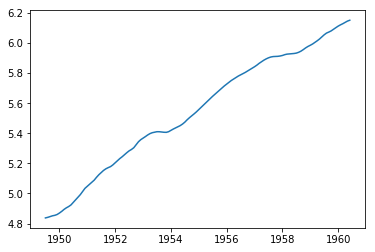

In [57]:
plt.plot(trend)

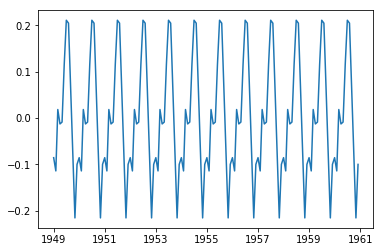

In [58]:
plt.plot(seasonal)

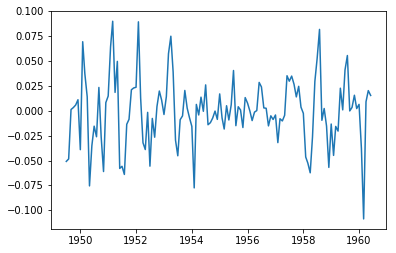

In [59]:
plt.plot(residual)

In [60]:
# plt.subplot(211)
# plt.plot(X)
# plt.legend('Original')
# plt.subplot(212)
# plt.plot(trend)
# plt.legend('Trend')
# plt.subplot(210)
# plt.plot(seasonal)
# plt.legend('Seasonal')
# plt.subplot(214)
# plt.plot(residual)
# plt.legend('Residual')

Text(0.5,1,'Residual')

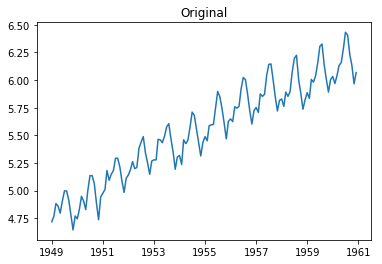

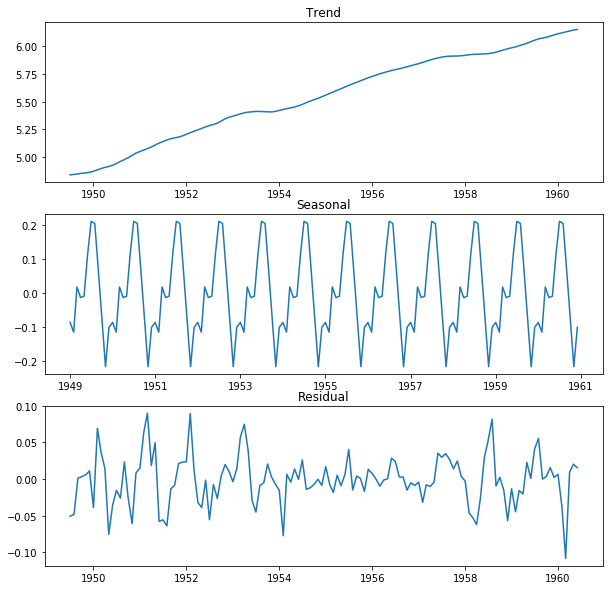

In [61]:
f,ax=plt.subplots(1)
ax.plot(X)
ax.set_title('Original')
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,10))
ax1.plot(trend)
ax1.set_title('Trend')
ax2.plot(seasonal)
ax2.set_title('Seasonal')
ax3.plot(residual)
ax3.set_title('Residual')

12


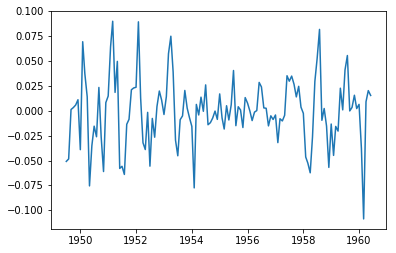

In [62]:
###modelling the residual series
print(residual.isna().sum())
residual.loc[residual.isna()]
residual.dropna(inplace=True)
plt.plot(residual)

In [63]:
#####checking stationarity of residuals

In [64]:
####exploring the mean and var of residual series
residualSeries1=residual[0:int(split)]
residualSeries2=residual[int(split):]
##checking for mean n var....whther they are constant in both groups
mean_1,mean_2=residualSeries1.mean(),residualSeries2.mean()
var_1,var_2=residualSeries1.var(),residualSeries2.var()
print(f'Mean of 1st group:{mean_1} and Variance is {var_1}') #-0.00165323463631938  ,  0.0012801986700981087
print(f'Mean of 2nd group:{mean_2} and Variance is {var_2}') #7.93854813607845e-05 , 0.0009503369256284574
####thus, mean and var of both group differ alot
print(f'Mean difference of both groups:{mean_2-mean_1}')##0.0017326201176801645 #### diff is very less so it is stationary series

Mean of 1st group:-0.00165323463631938 and Variance is 0.0012801986700981087
Mean of 2nd group:7.93854813607845e-05 and Variance is 0.0009503369256284574
Mean difference of both groups:0.0017326201176801645


In [65]:
####statistical test for stationarity-Augmented Dickey-Fuller test(type of unit root test)
print('--------------------For Residual series----------------')
stats_result=adfuller(residual.values)
print(stats_result)
print(f'ADF Test statistic: {stats_result[0]}')
print(f'p-value: {stats_result[1]}')
print('Critical values:')
for key,value in stats_result[4].items():
    print(key,':',value)
print(f'Max info criterion value:{stats_result[-1]}')
####### since adf test statistic value << critical value at 1% this means the series is stationary

--------------------For Residual series----------------
(-6.332386797644868, 2.8850589033233625e-08, 9, 122, {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}, -517.2642969403789)
ADF Test statistic: -6.332386797644868
p-value: 2.8850589033233625e-08
Critical values:
1% : -3.4851223522012855
5% : -2.88553750045158
10% : -2.5795685622144586
Max info criterion value:-517.2642969403789


## Time Series Forecasting after Differencing Technique

In [66]:
####determining model params p,d,q using ACF and PACF plots

In [67]:
acf_res=acf(differencingVal,nlags=20)

In [68]:
acf_res

array([ 1.        ,  0.19975134, -0.12010433, -0.15077204, -0.32207432,
       -0.08397453,  0.02577843, -0.11096075, -0.33672146, -0.11558631,
       -0.10926704,  0.20585223,  0.84142998,  0.21508704, -0.13955394,
       -0.11599576, -0.27894284, -0.05170646,  0.01245814, -0.1143576 ,
       -0.33717439])

In [69]:
len(acf_res)

21

In [70]:
# confidence interval [1.96 by squareroot(n)] -----https://discuss.analyticsvidhya.com/t/how-to-calculate-confidence-interval-in-the-acf-and-the-pacf-graph/18659
upper_conf=1.96/np.sqrt(len(acf_res))
lower_conf=-1.96/np.sqrt(len(acf_res))

In [71]:
upper_conf

0.42770706486254506

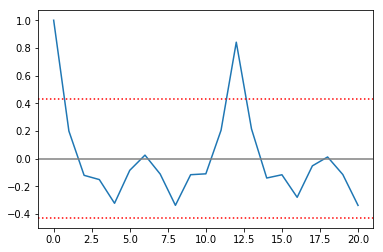

In [72]:
plt.plot(acf_res)
plt.axhline(0,color='grey',linestyle='solid')
plt.axhline(lower_conf,color='red',linestyle='dotted')
plt.axhline(upper_conf,color='red',linestyle='dotted')
####to find q: use ACF 
#the point which cuts the upper confidence interval line for the first time : in our case q=2.

In [73]:
pacf_res=pacf(differencingVal,nlags=20,method='ols')

In [74]:
# confidence interval [1.96 by squareroot(n)] -----https://discuss.analyticsvidhya.com/t/how-to-calculate-confidence-interval-in-the-acf-and-the-pacf-graph/18659
upper_conf=1.96/np.sqrt(len(pacf_res))
lower_conf=-1.96/np.sqrt(len(pacf_res))

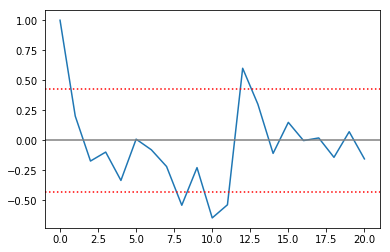

In [75]:
plt.plot(pacf_res)
plt.axhline(0,color='grey',linestyle='solid')
plt.axhline(lower_conf,color='red',linestyle='dotted')
plt.axhline(upper_conf,color='red',linestyle='dotted')
####to find p: use PACF 
#the point which cuts the upper confidence interval line for the first time : in our case p=2.

### AR model

In [76]:
####forecasting using AR model - p

In [77]:
ar_model=ARIMA(X,order=(2,1,0))
ar_res=ar_model.fit()

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


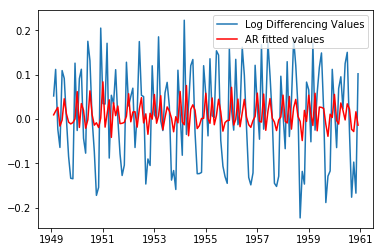

In [78]:
plt.plot(differencingVal,label='Log Differencing Values')
plt.plot(ar_res.fittedvalues,color='red',label='AR fitted values')
plt.legend(loc=1)

In [79]:
#find residual sum of squares (rss)
print(f'residual sum of squares of AR model:{np.round(np.sum((ar_res.fittedvalues-differencingVal.values)**2),3)}')

residual sum of squares of AR model:1.502


### MA model

In [80]:
####forecasting using MA model - q 

In [81]:
ma_model=ARIMA(X,order=(0,1,2))
ma_res=ma_model.fit(disp=-1)

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


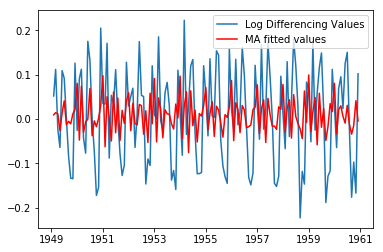

In [82]:
plt.plot(differencingVal,label='Log Differencing Values')
plt.plot(ma_res.fittedvalues,color='red',label='MA fitted values')
plt.legend(loc=1)

In [83]:
#find residual sum of squares (rss)
print(f'residual sum of squares of MA model:{np.round(np.sum((ma_res.fittedvalues-differencingVal.values)**2),3)}')

residual sum of squares of MA model:1.472


### ARIMA model

In [84]:
####forecasting using ARIMA model (p,d,q)

In [85]:
arima_model=ARIMA(X,order=(2,1,2))
arima_res=arima_model.fit(disp=-1)

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


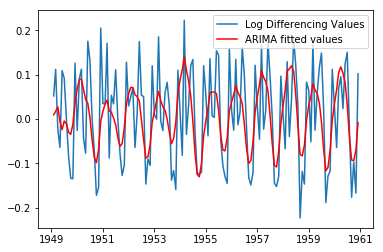

In [86]:
plt.plot(differencingVal,label='Log Differencing Values')
plt.plot(arima_res.fittedvalues,color='red',label='ARIMA fitted values')
plt.legend(loc=1)

In [87]:
#find residual sum of squares (rss)
print(f'residual sum of squares of ARIMA model:{np.round(np.sum((arima_res.fittedvalues-differencingVal.values)**2),3)}')

residual sum of squares of ARIMA model:1.029


In [88]:
arima_pred_diff=pd.Series(arima_res.fittedvalues)
arima_pred_diff.head()

Date
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [89]:
####cumultive sum
arima_pred_diff_cum=arima_pred_diff.cumsum()
arima_pred_diff_cum.head()

Date
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [90]:
arima_pred_results=pd.Series(X.iloc[0],index=X.index)

In [91]:
arima_pred_results=arima_pred_results.add(arima_pred_diff_cum,fill_value=0)

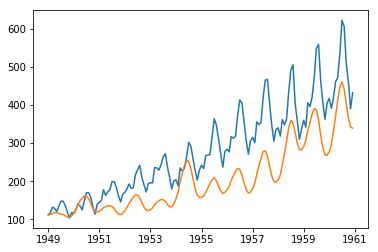

In [92]:
plt.plot(psgrSeries)
plt.plot(np.exp(arima_pred_results)) ###Log results converted to exponential to get the original results back

In [93]:
arima_Predictedfinal=np.exp(arima_pred_results)

In [94]:
arima_Predictedfinal.head()

Date
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073415
1949-04-01    118.301988
1949-05-01    117.768365
dtype: float64

In [95]:
arima_Predictedfinal.dtype

dtype('float64')

In [96]:
newValues=np.round(arima_Predictedfinal.values,0).astype('int64')

In [97]:
type(newValues)

numpy.ndarray

In [98]:
type(arima_Predictedfinal.values)

numpy.ndarray

In [99]:
# arima_Predictedfinal=arima_Predictedfinal.replace(to_replace=arima_Predictedfinal.values,value=newValues)

In [100]:
arima_Predictedfinal=arima_Predictedfinal.apply(int)

In [101]:
arima_Predictedfinal.head()

Date
1949-01-01    111
1949-02-01    113
1949-03-01    115
1949-04-01    118
1949-05-01    117
dtype: int64

In [102]:
arima_Predictedfinal.to_csv('Arima Prediction Results_data.csv',header=['Passenger Count'])

In [103]:
##### rmse - psgrSeries and arima_Predictedfinal

In [104]:
np.sqrt((np.sum((arima_Predictedfinal-psgrSeries)**2)/len(arima_Predictedfinal)))

90.50395172465

### Predictions using Arima model 

In [105]:
######using log data (X)

In [106]:
# train test split

In [107]:
train_data=X[0:int(0.6*len(X))]
test_data=X[int(0.6*len(X)):]
print(f'Train data:{train_data.shape}')
print(f'Test data:{test_data.shape}')

Train data:(86,)
Test data:(58,)


In [108]:
arima_model=ARIMA(train_data,order=(2,1,2))

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [109]:
arima_res=arima_model.fit(disp=-1)

In [110]:
arima_res.summary()
####AIC , BIC should be low..... - model is good


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.PassengerCount   No. Observations:                   85
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  87.405
Method:                       css-mle   S.D. of innovations              0.084
Date:                Mon, 13 May 2019   AIC                           -162.810
Time:                        10:42:20   BIC                           -148.154
Sample:                    02-01-1949   HQIC                          -156.915
                         - 02-01-1956                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0111      0.000     23.630      0.000       0.010       0.012
ar.L1.D.PassengerCount     1.4346      0.106     13.553      0.000       1.227       1.642
ar.L2.D.PassengerCount    -0.6989      0.081     -8.657      0.000      -0.857      -0.541
ma.L1.D.PassengerCount    -1.6841      0.137    -12.275      0.000      -1.953      -1.415
ma.L2.D.PassengerCount     0.6842      0.130      5.249      0.000       0.429       0.940
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0263           -0.6144j            1.1962           -0.0859
AR.2            1.0263           +0.6144j            1.1962            0.0859
MA.1            1.0003           +0.0000j            1.0003            0.0000
MA.2            1.4611           +0.0000j            1.4611            0.0000
-----------------------------------------------------------------------------
"""

#### Diagnostic Checking

In [111]:
# 1) low value of aic,bic 
# 2) mean of acf residuals shud be 0. (whitenoise)

In [112]:
#1)
print(arima_res.aic,arima_res.bic) ###very low
#2)
print(acf_res.mean()) ##0

-162.81002312782448 -148.15411558888258
0.005388828745382305


#### Predictions

In [113]:
train_data.tail()

Date
1955-10-01    5.613128
1955-11-01    5.468060
1955-12-01    5.627621
1956-01-01    5.648974
1956-02-01    5.624018
Name: PassengerCount, dtype: float64

In [114]:
######Forecasted values on test data
pred_values=arima_res.forecast(steps=len(test_data))[0]
print(len(pred_values))

58


In [115]:
pred_values

array([5.69082614, 5.75222955, 5.79655824, 5.82016972, 5.82599429,
       5.82078135, 5.81216542, 5.80638168, 5.80703922, 5.81495785,
       5.82879125, 5.8460351 , 5.86403771, 5.88074529, 5.89506475,
       5.90686338, 5.91671475, 5.9255344 , 5.93423492, 5.94348558,
       5.95360873, 5.96459902, 5.97622352, 5.98815181, 6.00007264,
       6.01177048, 6.02315363, 6.03424117, 6.04512458, 6.05592175,
       6.06673787, 6.07764144, 6.08865722, 6.09977286, 6.11095333,
       6.12215702, 6.1333487 , 6.14450692, 6.15562555, 6.16671076,
       6.1777757 , 6.1888349 , 6.19990006, 6.21097777, 6.22206931,
       6.23317193, 6.24428077, 6.2553908 , 6.26649818, 6.27760094,
       6.28869891, 6.29979324, 6.3108857 , 6.32197803, 6.33307146,
       6.34416657, 6.35526333, 6.36636126])

In [116]:
for i in range(len(test_data)):
    print(test_data[i])

5.75890177387728
5.746203190540153
5.762051382780177
5.924255797414532
6.023447592961033
6.003887067106539
5.872117789475416
5.723585101952381
5.602118820879701
5.723585101952381
5.752572638825633
5.707110264748875
5.87493073085203
5.8522024797744745
5.872117789475416
6.045005314036012
6.142037405587356
6.1463292576688975
6.0014148779611505
5.849324779946859
5.720311776607412
5.817111159963204
5.8289456176102075
5.762051382780177
5.8916442118257715
5.8522024797744745
5.8944028342648505
6.075346031088684
6.19644412779452
6.22455842927536
6.0014148779611505
5.883322388488279
5.736572297479192
5.820082930352362
5.886104031450156
5.834810737062605
6.0063531596017325
5.981414211254481
6.040254711277414
6.156978985585555
6.306275286948016
6.326149473155099
6.137727054086234
6.008813185442595
5.8916442118257715
6.003887067106539
6.0330862217988015
5.968707559985366
6.037870919922137
6.133398042996649
6.156978985585555
6.282266746896006
6.432940092739179
6.406879986069314
6.230481447578482
6.1

In [117]:
actual_test=np.exp(test_data.values)

In [118]:
actual_test

array([317., 313., 318., 374., 413., 405., 355., 306., 271., 306., 315.,
       301., 356., 348., 355., 422., 465., 467., 404., 347., 305., 336.,
       340., 318., 362., 348., 363., 435., 491., 505., 404., 359., 310.,
       337., 360., 342., 406., 396., 420., 472., 548., 559., 463., 407.,
       362., 405., 417., 391., 419., 461., 472., 535., 622., 606., 508.,
       461., 390., 432.])

In [119]:
test_data.index

DatetimeIndex(['1956-03-01', '1956-04-01', '1956-05-01', '1956-06-01',
               '1956-07-01', '1956-08-01', '1956-09-01', '1956-10-01',
               '1956-11-01', '1956-12-01', '1957-01-01', '1957-02-01',
               '1957-03-01', '1957-04-01', '1957-05-01', '1957-06-01',
               '1957-07-01', '1957-08-01', '1957-09-01', '1957-10-01',
               '1957-11-01', '1957-12-01', '1958-01-01', '1958-02-01',
               '1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01', '1959-01-01', '1959-02-01',
               '1959-03-01', '1959-04-01', '1959-05-01', '1959-06-01',
               '1959-07-01', '1959-08-01', '1959-09-01', '1959-10-01',
               '1959-11-01', '1959-12-01', '1960-01-01', '1960-02-01',
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
      

In [120]:
df=pd.DataFrame()
df['Date']=test_data.index
df['Actual']=np.round(actual_test,0).astype('int64')
df['Predicted']=np.round(np.exp(pred_values),0).astype('int64')

In [121]:
df.to_csv('Result\\Arima_logTestdata.csv',index=False)